In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:13<00:00, 141MB/s]
100% 2.04G/2.04G [00:13<00:00, 157MB/s]


In [ ]:
import os

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plantvillage-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
os.listdir("/content/plantvillage dataset")

['grayscale', 'color', 'segmented']

In [ ]:
print("color len: ",len(os.listdir("/content/plantvillage dataset/color")))
print("color: ",os.listdir("/content/plantvillage dataset/color")[:5])

print("grayscale len: ",len(os.listdir("/content/plantvillage dataset/grayscale")))
print("grayscale: ",os.listdir("/content/plantvillage dataset/grayscale")[:5])

print("segmented len: ",len(os.listdir("/content/plantvillage dataset/segmented")))
print("segmented: ",os.listdir("/content/plantvillage dataset/segmented")[:5])

color len:  38
color:  ['Potato___Early_blight', 'Strawberry___Leaf_scorch', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Early_blight', 'Blueberry___healthy']
grayscale len:  38
grayscale:  ['Potato___Early_blight', 'Strawberry___Leaf_scorch', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Early_blight', 'Blueberry___healthy']
segmented len:  38
segmented:  ['Potato___Early_blight', 'Strawberry___Leaf_scorch', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Early_blight', 'Blueberry___healthy']


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['e53defea-84c4-4b41-8c12-a53dda9e61b8___Mt.N.V_HL 9085.JPG', 'bcbb4e29-0986-425c-af3a-bb7be3736548___Mt.N.V_HL 6020.JPG', '304f5d6d-b17f-4e89-9196-9e649f117d03___Mt.N.V_HL 6189.JPG', '29ffbe00-4f75-496b-8bb5-dc1be1eb73b3___Mt.N.V_HL 8956.JPG', 'b2de09b2-4c5d-4be5-a06f-27419db0f696___Mt.N.V_HL 6097.JPG']


In [ ]:
# Data preprocessig
# database path
base_dir = "/content/plantvillage dataset/color"

In [ ]:
import matplotlib.image as mping

(256, 256, 3)


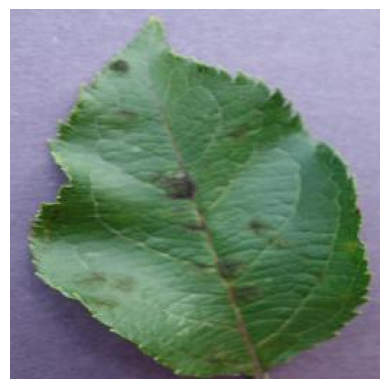

In [ ]:
image_path = "/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"

img = mping.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

(256, 256, 3)


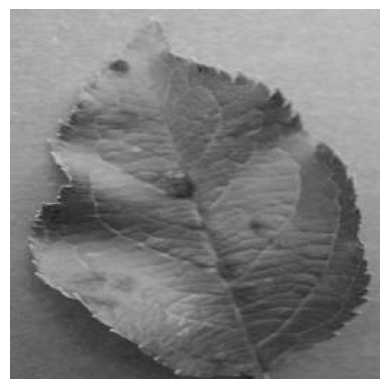

In [ ]:
image_path = "/content/plantvillage dataset/grayscale/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"
img = mping.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

(256, 256, 3)


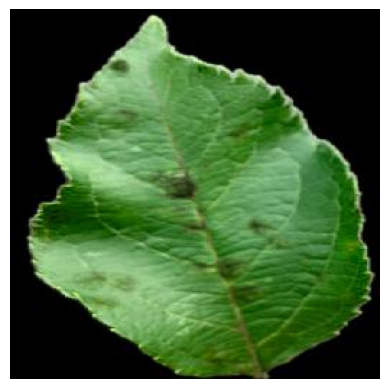

In [ ]:
img_path = "/content/plantvillage dataset/segmented/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_final_masked.jpg"

img = mping.imread(img_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
img.shape

(256, 256, 3)

In [ ]:
# Image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size=32

image_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
# Train generator
train_ds = image_gen.flow_from_directory(
    base_dir,
    target_size=(256,256),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Train generator
validation_ds = image_gen.flow_from_directory(
    base_dir,
    target_size=(256,256),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 10849 images belonging to 38 classes.


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Input,Flatten,Dropout,BatchNormalization

In [ ]:
model = Sequential()

model.add(Input(shape=(256,256,3)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(train_ds.num_classes,activation='softmax'))

In [ ]:
train_ds.num_classes

38

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,808,326 (64.12 MB)

 Trainable params: 16,808,326 (64.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,validation_data=validation_ds,epochs=5,batch_size=batch_size)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 131s 89ms/step - accuracy: 0.2546 - loss: 2.8483 - val_accuracy: 0.5676 - val_loss: 1.4774
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 143s 96ms/step - accuracy: 0.5146 - loss: 1.6246 - val_accuracy: 0.6859 - val_loss: 1.0747
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 117s 86ms/step - accuracy: 0.5932 - loss: 1.3242 - val_accuracy: 0.7363 - val_loss: 0.8927
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 167s 104ms/step - accuracy: 0.6499 - loss: 1.1209 - val_accuracy: 0.7328 - val_loss: 0.8926
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 162s 119ms/step - accuracy: 0.6856 - loss: 1.0031 - val_accuracy: 0.7475 - val_loss: 0.8324


In [ ]:
# Evaluating
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_ds, batch_size=batch_size)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

Evaluating model...
340/340 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.7436 - loss: 0.8464
Validation loss: 0.8323795199394226
Validation accuracy: 0.7475343346595764


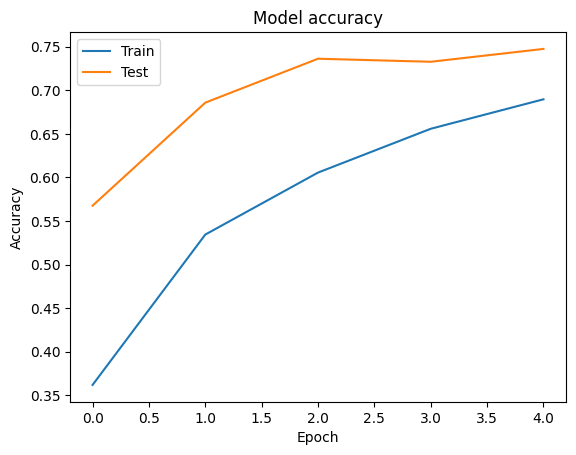

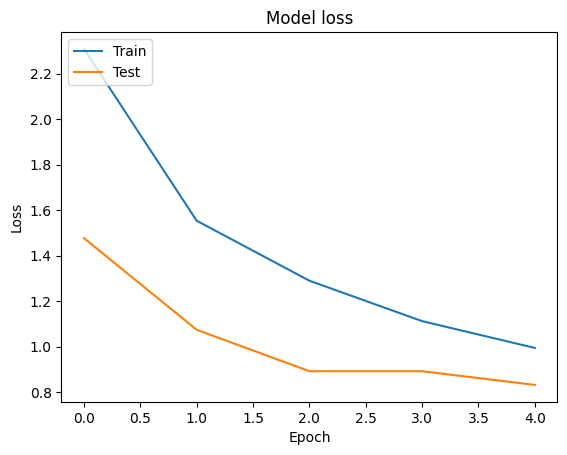

In [ ]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Building a Predictive System

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(256, 256)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {value: key for key, value in train_ds.class_indices.items()}

In [ ]:
train_ds.class_indices.items()

dict_items([('Apple___Apple_scab', 0), ('Apple___Black_rot', 1), ('Apple___Cedar_apple_rust', 2), ('Apple___healthy', 3), ('Blueberry___healthy', 4), ('Cherry_(including_sour)___Powdery_mildew', 5), ('Cherry_(including_sour)___healthy', 6), ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 7), ('Corn_(maize)___Common_rust_', 8), ('Corn_(maize)___Northern_Leaf_Blight', 9), ('Corn_(maize)___healthy', 10), ('Grape___Black_rot', 11), ('Grape___Esca_(Black_Measles)', 12), ('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 13), ('Grape___healthy', 14), ('Orange___Haunglongbing_(Citrus_greening)', 15), ('Peach___Bacterial_spot', 16), ('Peach___healthy', 17), ('Pepper,_bell___Bacterial_spot', 18), ('Pepper,_bell___healthy', 19), ('Potato___Early_blight', 20), ('Potato___Late_blight', 21), ('Potato___healthy', 22), ('Raspberry___healthy', 23), ('Soybean___healthy', 24), ('Squash___Powdery_mildew', 25), ('Strawberry___Leaf_scorch', 26), ('Strawberry___healthy', 27), ('Tomato___Bacterial_spot', 

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
import json
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
# Example Usage
# image_path = '/content/test_apple_black_rot.JPG'
image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class Name: Blueberry___healthy


# Save the model to Google drive or local

In [ ]:
model.save('drive/MyDrive/plant_disease_prediction_model.h5')

In [ ]:
model.save('plant_disease_prediction_model.h5')